In [211]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.special as spc



#formatting plots a little nicer
plt.style.use('default')
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['font.family'] = 'Arial'

mpl.rcParams['figure.dpi'] = 400
mpl.rcParams['pdf.fonttype'] = 42 # use to make sure exported pdf's have editable text

In [213]:
# # formatting plots a little nicer
# plt.style.use('default')
# mpl.rcParams['mathtext.fontset'] = 'custom'
# mpl.rcParams['font.family'] = 'Arial'

# mpl.rcParams['pdf.fonttype'] = 42 # use to make sure exported pdf's have editable text

In [215]:
print(mpl.__version__)

3.10.3


In [217]:
sigma = 5.67e-8
alpha = 0.3
Tf = 1100
z = 0.225

In [219]:
def brush_input(H,x,z):
    return np.pi*(2*x**2+(H-z)**2)/(2*(x**2+(H-z)**2)**(3/2))

def brush_input_kW(H,x,z):
    return sigma * Tf**4 * 2*z * (2*x**2+(H-z)**2)/(2*(x**2+(H-z)**2)**(3/2))

Text(0, 0.5, 'Height on wall [m]')

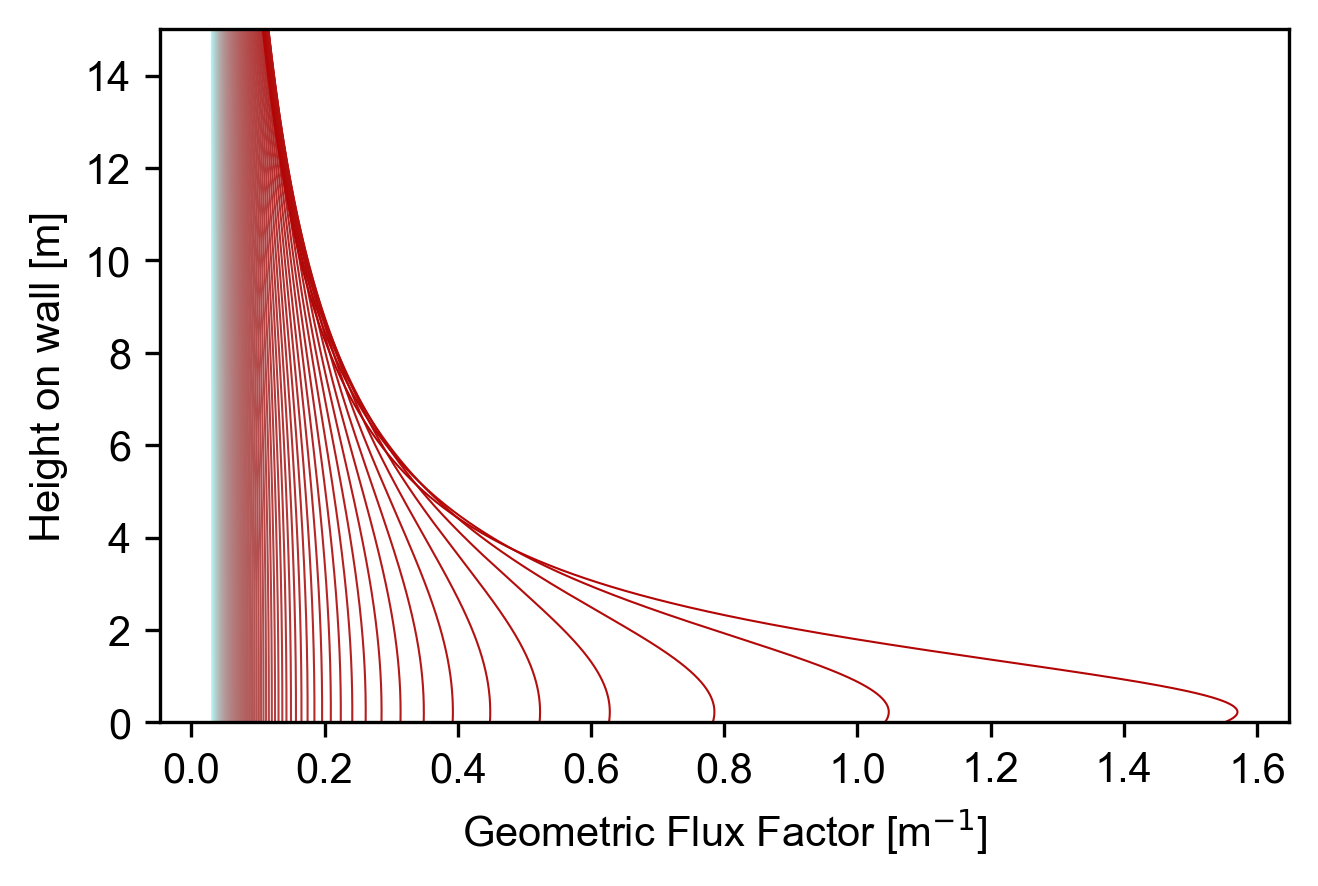

In [221]:
plt.figure(figsize=(1.618*3,3), dpi=300)
H_vals = np.arange(0,20,0.01)
xmax = 100
dx=1
x0 = 2

for x in np.flip(np.arange(x0,xmax+dx,dx)):
    Q_vals = [brush_input(H,x,0.225) for H in H_vals]
    plt.plot(Q_vals, H_vals,lw=0.5, c=(0.7,x/(xmax+dx),x/(xmax+dx)))
#plt.xlim(0,35)
plt.ylim(0,15)
plt.xlabel('Geometric Flux Factor [m$^{-1}$]')
plt.ylabel('Height on wall [m]')

Text(0, 0.5, 'Height on wall [m]')

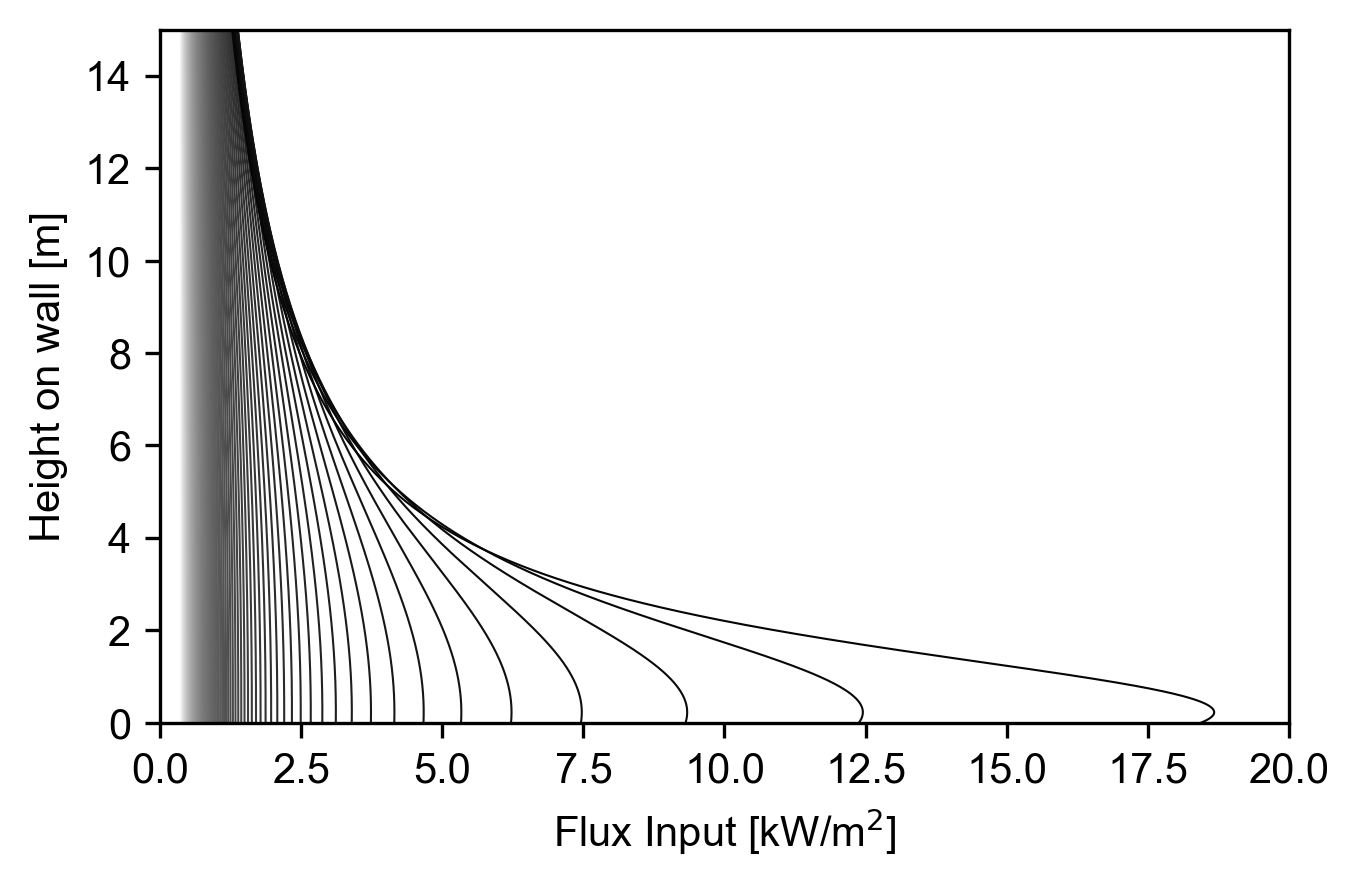

In [223]:
plt.figure(figsize=(1.618*3,3), dpi=300)
H_vals = np.arange(0,20,0.01)
xmax = 100
dx=1
x0 = 2

for x in np.flip(np.arange(x0,xmax+dx,dx)):
    Q_vals = [brush_input_kW(H,x,0.225)/1000 for H in H_vals]
    plt.plot(Q_vals, H_vals,lw=0.5, c=(x/(xmax+dx),x/(xmax+dx),x/(xmax+dx)))
plt.xlim(0,20)
plt.ylim(0,15)
plt.xlabel('Flux Input [kW/m$^2$]')
plt.ylabel('Height on wall [m]')

In [224]:
# plt.figure(figsize=(7,7), dpi=150)
# H_vals = np.arange(0,20,0.01)

# for x in np.arange(2,10.1,0.01):
#     Q_vals = [brush_input(H,x,0.225) for H in H_vals]
#     plt.plot(Q_vals, H_vals,lw=0.7)
# #plt.xlim(0,5)
# plt.ylim(0,5)
# plt.xlabel('Geometric Flux Factor [m$^{-1}$]')
# plt.ylabel('Height on wall [m]')

In [227]:
def brush_input_alternate(H,x,z):
    return 2 * x * spc.ellipk(-(H-z)**2 / x**2) / (x**2+(H-z)**2)

def brush_input_alternate_kW(H,x,z):
    return (1-alpha) * sigma * Tfire**4 * z * 2 * x * spc.ellipk(-(H-z)**2 / x**2) / (x**2+(H-z)**2)

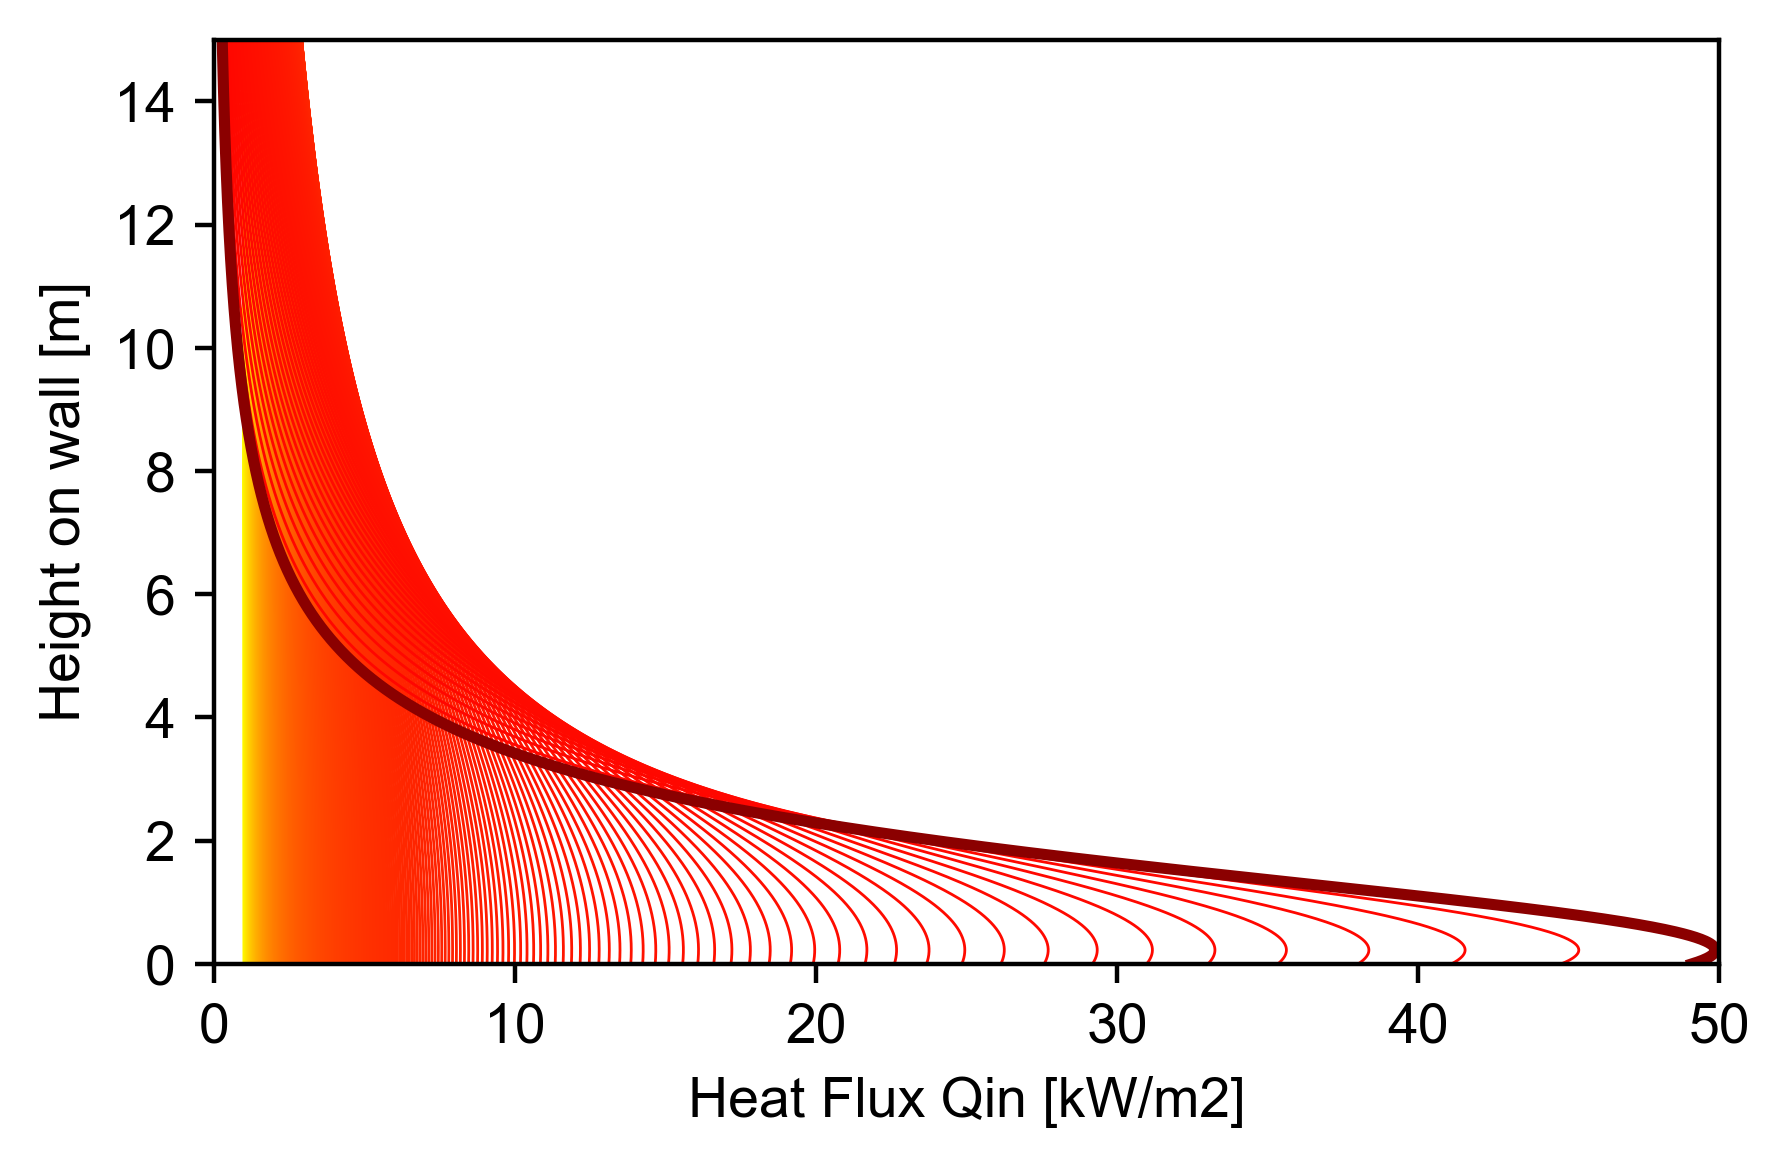

In [229]:
Tfire=1100+273.15

plt.figure(figsize=(1.618*3,3))
H_vals = np.arange(0,20,0.01)

for x in np.flip(np.arange(2,101,0.2)):
    Q_vals = np.array([brush_input_alternate_kW(H,x,0.225) for H in H_vals])
    plt.plot(Q_vals/1000, H_vals,lw=0.5, c=(1,x/(xmax+dx),0))

plt.plot(Q_vals/1000, H_vals,lw=2, c='darkred')

plt.xlim(0,50)
plt.ylim(0,15)
plt.xlabel('Heat Flux Qin [kW/m2]')
plt.ylabel('Height on wall [m]')

plt.savefig('media/figures/flux_input_brush.pdf')

In [118]:
max(Q_vals)

49871.45352313467

In [119]:
# plt.figure(figsize=(7,7), dpi=150)
# H_vals = np.arange(0,20,0.01)

# for x in np.flip(np.arange(2,10.1,0.01)):
#     Q_vals = [brush_input_alternate(H,x,0.225) for H in H_vals]
#     plt.plot(Q_vals, H_vals,lw=0.5)
# plt.xlim(0,5)
# plt.ylim(0,10)
# plt.xlabel('Geometric Flux Factor [m$^{-1}$]')
# plt.ylabel('Height on wall [m]')

In [120]:
xmax = 0.5
dx = 0.01
x = np.arange(0, xmax+dx, dx)
xmid = np.arange(dx/2, xmax+(dx/2), dx)

tmax = 2000
dt = 1
t = np.arange(0,tmax+dt,dt)

In [121]:
k = 2
rho = 2650
kappa = 1e-6
c = k/(rho*kappa)
sigma = 5.67e-8

In [122]:
%%time

Q = np.zeros(np.size(x))
T0 = 10 + 273.15

Tfire=1100+273.15
Tcrit = 500
R=8314
Ea=7e7
spall_length = 0.01

dz = 0.02
d0=0
z0 = 0
zmax = 15
z_vals = np.arange(z0,zmax+dz,dz)
zfire = 0.225

T = T0*np.ones((len(t),len(xmid),len(z_vals)))

nfires = 1
d = d0*np.ones((nfires+1,len(z_vals)))
damage = np.zeros((nfires+1,len(z_vals)))

brush_distance = np.flip(np.arange(0.1,100.1+0.1,0.1))
brush_distance = np.append(brush_distance, 10000*np.ones(len(t)))

for n in range(nfires):
    T = T0*np.ones((len(t)+1,len(xmid),len(z_vals)))
    Q = np.zeros(np.size(x))
    for z in range(len(z_vals)): # array this loop    
        for i in range(len(t)):
            Qin = brush_input_alternate_kW(z_vals[z],brush_distance[i]+d[n,z],zfire)
            Qout = sigma * T[i,0,z]**4
            Qbase = 0
            Q0 = Qin - Qout
            Q[0] = Q0
            Q[-1] = Qbase
            Q[1:-1] = -k*np.diff(T[i,:,z])/dx
            dTdt = -(1/(rho*c))*np.diff(Q)/dx
            
            T[i+1,:,z] = T[i,:,z] + dTdt*dt

        if np.max(T[:,:,z])>Tcrit:
            d[n+1,z]=d[n,z]+spall_length
            damage[n+1,z] = 0
        else:
            d[n+1,z]=d[n,z]
            damage_add = np.exp(-Ea/(R*np.max(T[:,:,z])))/np.exp(-Ea/(R*Tcrit))
            damage[n+1,z] = damage[n,z] + damage_add
        if damage[n+1,z]>1:
            d[n+1,z]=d[n,z]+spall_length
            damage[n+1,z] = 0

CPU times: user 14.8 s, sys: 665 ms, total: 15.4 s
Wall time: 15.8 s


Text(0.5, 1.0, 'Temperature/Time by Depth, H=2.5m')

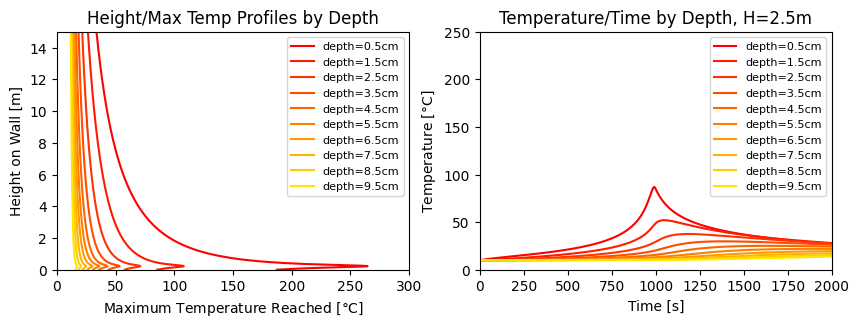

In [128]:
fig, axs = plt.subplots(1,2,figsize=(10,5/1.618))
ax1=axs[0]
ax2=axs[1]


###########ax1########################
max_depth = 10
length = len(xmid[:max_depth])

for x in range(len(xmid[:max_depth])):
    ax1.plot([np.max(T[:,x,z])-273.15 for z in range(len(z_vals))], z_vals, c=(1,x/length,0), label='depth={:.1f}cm'.format(xmid[x]*100))

ax1.legend(fontsize=8)
ax1.set_xlim(0,300)
ax1.set_ylim(0,15)
ax1.set_xlabel(r'Maximum Temperature Reached [$\degree$C]')
ax1.set_ylabel('Height on Wall [m]')
ax1.set_title('Height/Max Temp Profiles by Depth')

###########ax2########################
max_depth = 10
length = len(xmid[:max_depth])

for x in range(len(xmid[:max_depth])):
    ax2.plot(t, T[1:,x,125]-273.15, c=(1,x/length,0), label='depth={:.1f}cm'.format(xmid[x]*100))

ax2.legend(fontsize=8)
ax2.set_xlim(0,2000)
ax2.set_ylim(0,250)
ax2.set_xlabel('Time [s]')
ax2.set_ylabel(r'Temperature [$\degree$C]')
ax2.set_title('Temperature/Time by Depth, H=2.5m')

#plt.savefig('media/figures/fig11AB.pdf', dpi=500)

Text(0.5, 1.0, 'Height/Max Temp Profiles by Depth')

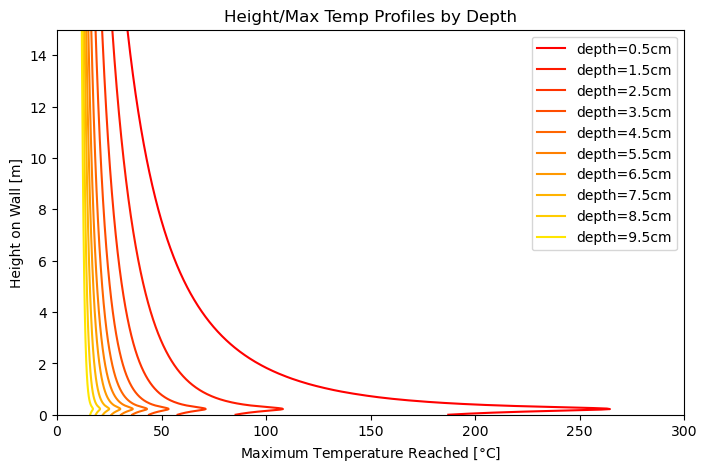

In [252]:
fig = plt.figure(figsize=(1.618*5,5))

max_depth = 10
length = len(xmid[:max_depth])

for x in range(len(xmid[:max_depth])):
    plt.plot([np.max(T[:,x,z])-273.15 for z in range(len(z_vals))], z_vals, c=(1,x/length,0), label='depth={:.1f}cm'.format(xmid[x]*100))

plt.legend()
plt.xlim(0,300)
plt.ylim(0,15)
plt.xlabel(r'Maximum Temperature Reached [$\degree$C]')
plt.ylabel('Height on Wall [m]')
plt.title('Height/Max Temp Profiles by Depth')

Text(0.5, 1.0, 'Temperature/Time by Depth, H=2.5m')

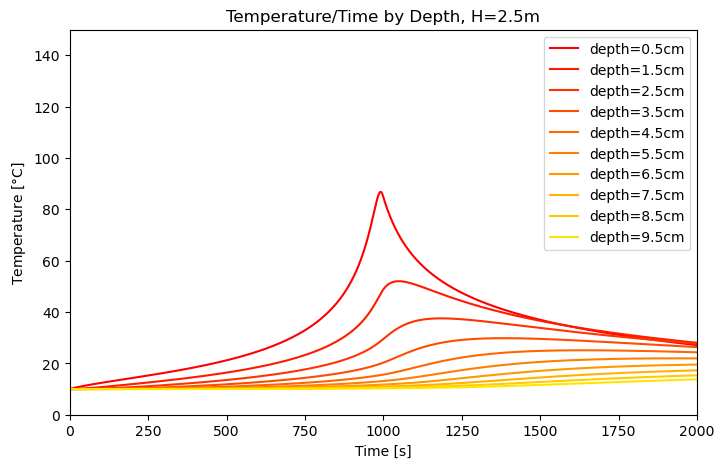

In [34]:
fig = plt.figure(figsize=(5,5/1.618))

max_depth = 10
length = len(xmid[:max_depth])

for x in range(len(xmid[:max_depth])):
    plt.plot(t, T[1:,x,125]-273.15, c=(1,x/length,0), label='depth={:.1f}cm'.format(xmid[x]*100))

plt.legend()
plt.xlim(0,2000)
plt.ylim(0,150)
plt.xlabel('Time [s]')
plt.ylabel(r'Temperature [$\degree$C]')
plt.title('Temperature/Time by Depth, H=2.5m')

In [29]:
z_vals[125]

2.5

In [30]:
z_vals[5]

0.1

Text(0.5, 1.0, 'Temperature/Time by Depth, H=0.1m')

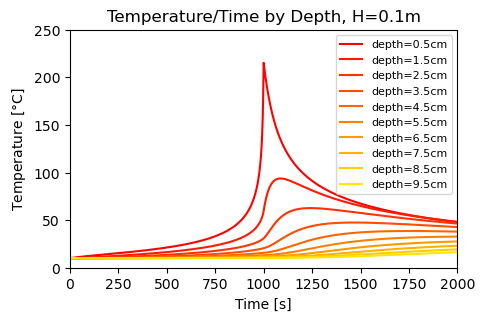

In [68]:
fig = plt.figure(figsize=(5,5/1.618))

max_depth = 10
length = len(xmid[:max_depth])

for x in range(len(xmid[:max_depth])):
    plt.plot(t, T[1:,x,5]-273.15, c=(1,x/length,0), label='depth={:.1f}cm'.format(xmid[x]*100))

plt.legend(fontsize=8)
plt.xlim(0,2000)
plt.ylim(0,250)
plt.xlabel('Time [s]')
plt.ylabel(r'Temperature [$\degree$C]')
plt.title('Temperature/Time by Depth, H=0.1m')

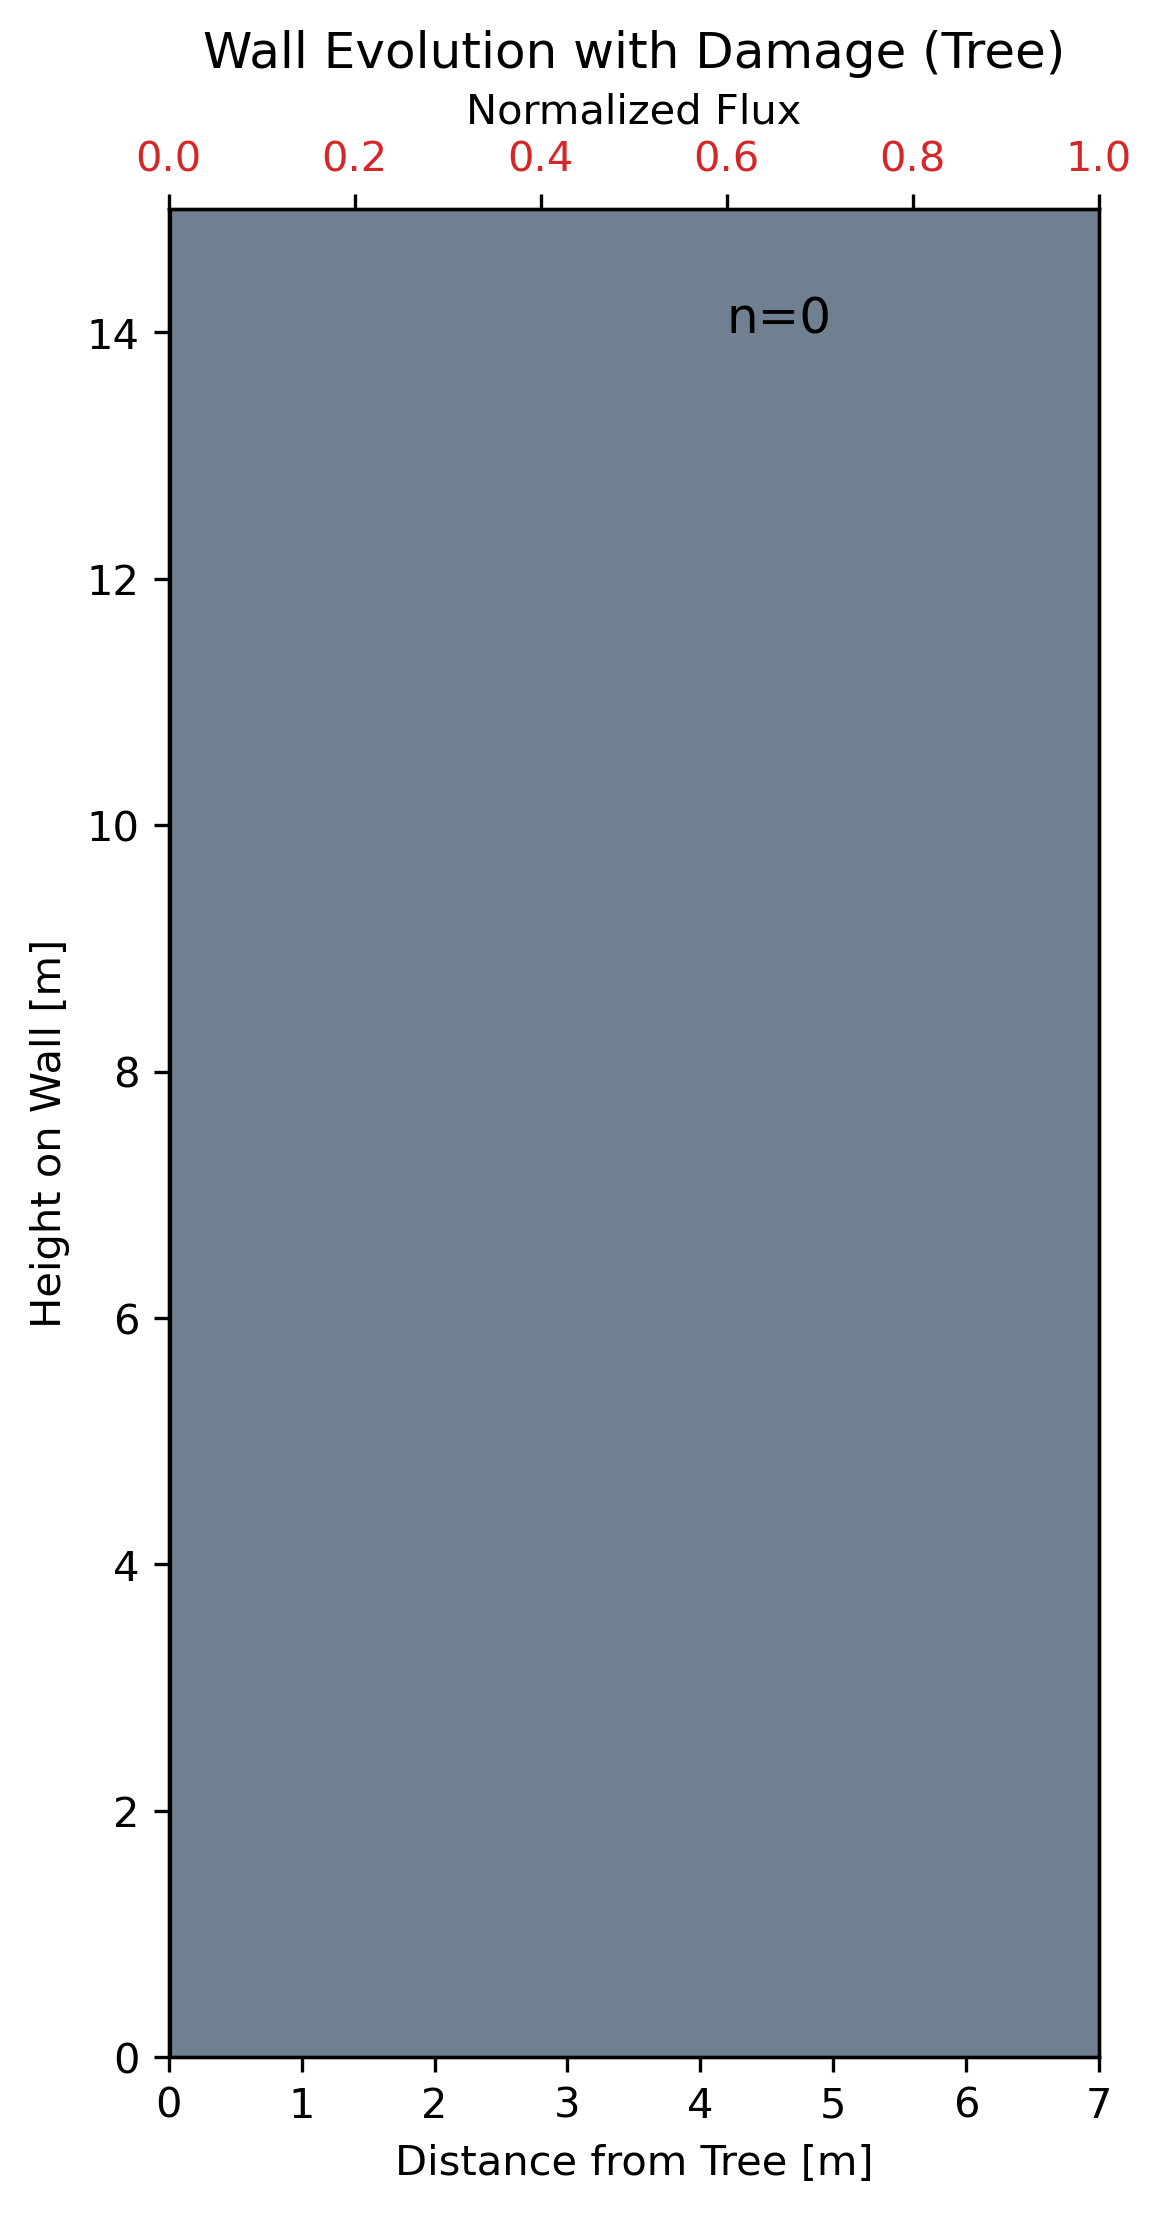

In [33]:
fig, ax1 = plt.subplots(1, 1, figsize=(4,8), dpi=300)
#Q = np.array([Q_in(z_vals[z],50,d[n,z]) for z in range(len(z_vals))])
#Q0 = np.array([Q_in(z_vals[z],50,d[0,z]) for z in range(len(z_vals))])
ax1.plot(d[n,:], z_vals, c='k')
ax1.fill_betweenx(z_vals,d[n,:], 7, color='slategrey')
ax1.text(4.2,14, 'n={}'.format(n), fontsize=12)
ax1.set_title('Wall Evolution with Damage (Tree)')
ax1.set_ylabel('Height on Wall [m]')
ax1.set_xlabel('Distance from Tree [m]')
ax1.set_xlim(0,7)
ax1.set_ylim(0,15)

ax2 = ax1.twiny()
color = 'tab:red'
#ax2.plot((Q/Qmax),z_vals, c='red')
#ax2.plot(Q0/Qmax,z_vals, c='red', ls='--')
ax2.tick_params(axis='x', labelcolor=color)
ax2.set_xlim(0,1)
ax2.set_xlabel('Normalized Flux')

if n>500:
    ax1.plot(d[500,:], z_vals, c='k')
if n>1000:
    ax1.plot(d[1000,:], z_vals, c='k')
if n>1500:
    ax1.plot(d[1500,:], z_vals, c='k')
if n>2000:
    ax1.plot(d[2000,:], z_vals, c='k')
if n>2500:
    ax1.plot(d[2500,:], z_vals, c='k')
if n>3000:
    ax1.plot(d[3000,:], z_vals, c='k')
if n>3500:
    ax1.plot(d[3500,:], z_vals, c='k')
if n>4000:
    ax1.plot(d[4000,:], z_vals, c='k')
if n>4500:
    ax1.plot(d[4500,:], z_vals, c='k')

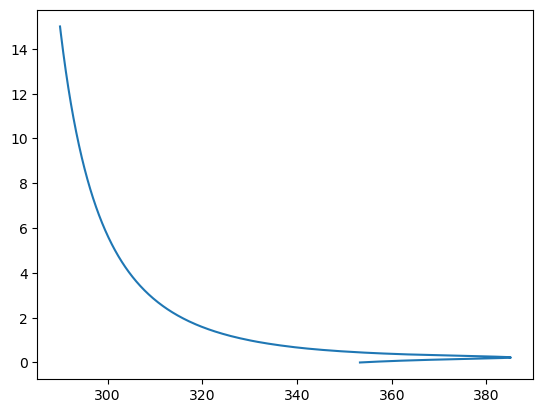

In [34]:
plt.plot([np.max(T[:,0,z]) for z in range(len(z_vals))], z_vals)

In [35]:
(150/(5.67e-8))**(1/4)

226.79164443904006

In [36]:
#bring closest brush to 1m or less to wall

Text(0.5, 1.0, 'Temperature Map at t=1000s')

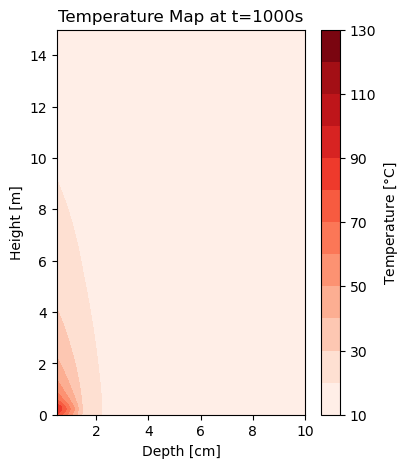

In [52]:
fig = plt.figure(figsize=(4,5))


X,Y = np.meshgrid(xmid*100,z_vals, indexing='ij')
levels = np.arange(10,125+10,10)

tindex = 1000

plt.contourf(X,Y,T[tindex,:,:]-273.15,cmap='Reds', levels=levels)
plt.colorbar(label=r'Temperature [$\degree$C]')
plt.xlim(0.5,10)
plt.xlabel('Depth [cm]')
plt.ylabel('Height [m]')
plt.title('Temperature Map at t={}s'.format(t[tindex]))

Text(0.5, 1.0, 'Temperature Map at t=1100s')

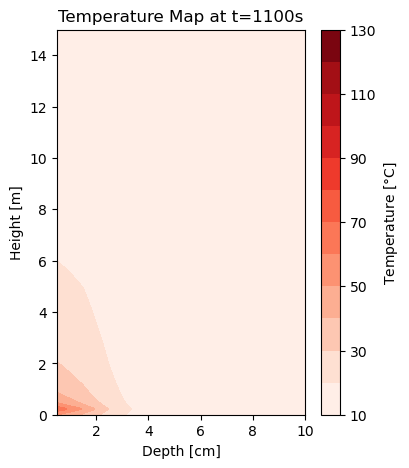

In [54]:
fig = plt.figure(figsize=(4,5))


X,Y = np.meshgrid(xmid*100,z_vals, indexing='ij')
levels = np.arange(10,125+10,10)

tindex = 1100

plt.contourf(X,Y,T[tindex,:,:]-273.15,cmap='Reds', levels=levels)
plt.colorbar(label=r'Temperature [$\degree$C]')
plt.xlim(0.5,10)
plt.xlabel('Depth [cm]')
plt.ylabel('Height [m]')
plt.title('Temperature Map at t={}s'.format(t[tindex]))

Text(0.5, 1.0, 'Temperature/Time by Depth, H=0.1m')

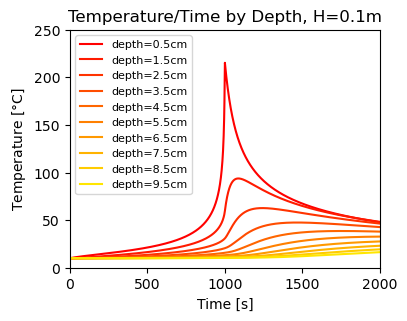

In [154]:
fig = plt.figure(figsize=(4,5/1.618))

max_depth = 10
length = len(xmid[:max_depth])

for x in range(len(xmid[:max_depth])):
    plt.plot(t, T[1:,x,5]-273.15, c=(1,x/length,0), label='depth={:.1f}cm'.format(xmid[x]*100))

plt.legend(fontsize=8)
plt.xlim(0,2000)
plt.ylim(0,250)
plt.xlabel('Time [s]')
plt.ylabel(r'Temperature [$\degree$C]')
plt.title('Temperature/Time by Depth, H=0.1m')

Text(0.5, 1.0, 't=1100s')

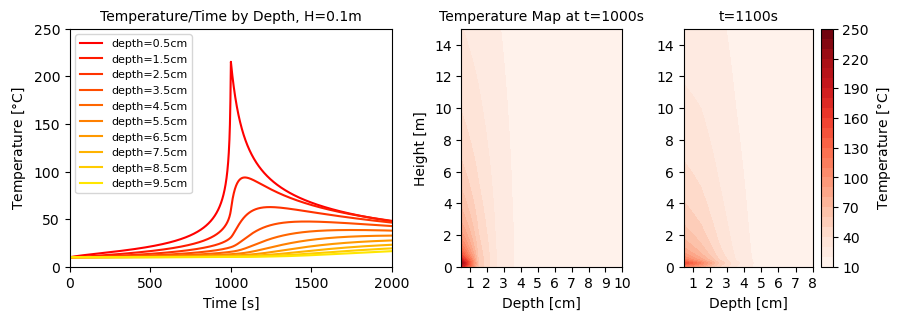

In [260]:
#fig, axs = plt.subplots(1,3,figsize=(10,5/1.618))
#ax1=axs[0]
#ax2=axs[1]
#ax3=axs[2]

#ax1.set_box_aspect(1)
#ax2.set_box_aspect(1.5)
#ax3.set_box_aspect(1.5)
#plt.subplots_adjust(wspace=0.001)
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(10,5/1.618))

spec = gridspec.GridSpec(ncols=5, nrows=1, figure=fig,width_ratios=[2,0.1,1,0.05,1])
ax1  = fig.add_subplot(spec[0, 0])
ax2  = fig.add_subplot(spec[0, 2])
ax3  = fig.add_subplot(spec[0, 4])

###########ax1########################
max_depth = 10
length = len(xmid[:max_depth])



for x in range(len(xmid[:max_depth])):
    ax1.plot(t, T[1:,x,5]-273.15, c=(1,x/length,0), label='depth={:.1f}cm'.format(xmid[x]*100))

ax1.legend(fontsize=8)
ax1.set_xlim(0,2000)
ax1.set_ylim(0,250)
ax1.set_xlabel('Time [s]')
ax1.set_ylabel(r'Temperature [$\degree$C]',fontsize=10)
ax1.set_title('Temperature/Time by Depth, H=0.1m',fontsize=10)

###########ax2########################
X,Y = np.meshgrid(xmid*100,z_vals, indexing='ij')
levels = np.arange(10,250+10,10)

tindex = 1000

cm = ax2.contourf(X,Y,T[tindex,:,:]-273.15,cmap='Reds', levels=levels)
ax2.contourf(X,Y,T[tindex,:,:]-273.15,cmap='Reds', levels=levels)
#ax2.colorbar(label=r'Temperature [$\degree$C]')
ax2.set_xlim(0.5,10)
ax2.set_xlabel('Depth [cm]',fontsize=10)
ax2.set_ylabel('Height [m]',fontsize=10)
ax2.set_title('Temperature Map at t={}s'.format(t[tindex]),fontsize=10)
ax2.set_xticks(np.arange(1,11))

fig.colorbar(cm, label=r'Temperature [$\degree$C]', ax=ax3)

#############ax3#############################
tindex = 1100

ax3.contourf(X,Y,T[tindex,:,:]-273.15,cmap='Reds', levels=levels)
ax3.set_xlim(0.5,8)
ax3.set_xlabel('Depth [cm]',fontsize=10)
ax3.set_xticks(np.arange(1,9))
#ax3.set_ylabel('Height [m]',fontsize=10)
ax3.set_title('t={}s'.format(t[tindex]),fontsize=10)

#plt.savefig('media/figures/fig11CD.pdf')

Text(0.5, 1.0, 'Temperature Map at t=1100s')

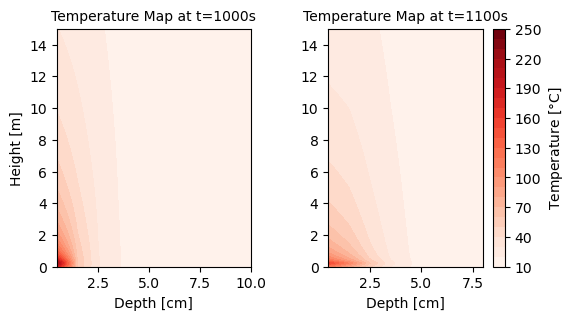

In [152]:
fig, axs = plt.subplots(1,2,figsize=(6,5/1.618))

ax2=axs[0]
ax3=axs[1]

plt.subplots_adjust(wspace=0.4)

###########ax2########################
X,Y = np.meshgrid(xmid*100,z_vals, indexing='ij')
levels = np.arange(10,250+10,10)

tindex = 1000

cm = ax2.contourf(X,Y,T[tindex,:,:]-273.15,cmap='Reds', levels=levels)
ax2.contourf(X,Y,T[tindex,:,:]-273.15,cmap='Reds', levels=levels)
#ax2.colorbar(label=r'Temperature [$\degree$C]')
ax2.set_xlim(0.5,10)
ax2.set_xlabel('Depth [cm]',fontsize=10)
ax2.set_ylabel('Height [m]',fontsize=10)
ax2.set_title('Temperature Map at t={}s'.format(t[tindex]),fontsize=10)

fig.colorbar(cm, label=r'Temperature [$\degree$C]', ax=ax3)

#############ax3#############################
tindex = 1100

ax3.contourf(X,Y,T[tindex,:,:]-273.15,cmap='Reds', levels=levels)
ax3.set_xlim(0.5,8)
ax3.set_xlabel('Depth [cm]',fontsize=10)
#ax3.set_ylabel('Height [m]',fontsize=10)
ax3.set_title('Temperature Map at t={}s'.format(t[tindex]),fontsize=10)